In [667]:
from IPython.display import Image
import numpy as np
from matrices import linPolarizer, lhcPolarizer, rhcPolarizer, plotPoincare
from sympy import symbols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

np.set_printoptions(precision=2)

# 6 Pixel Array

Now that we've done the 4 pixel linear wire grid array, let's insert our fancy chiral polarization filters and get some sensitivity to circular polarizations! Note that This notebook will take things derived in `4pixelarray.ipynb` for granted.

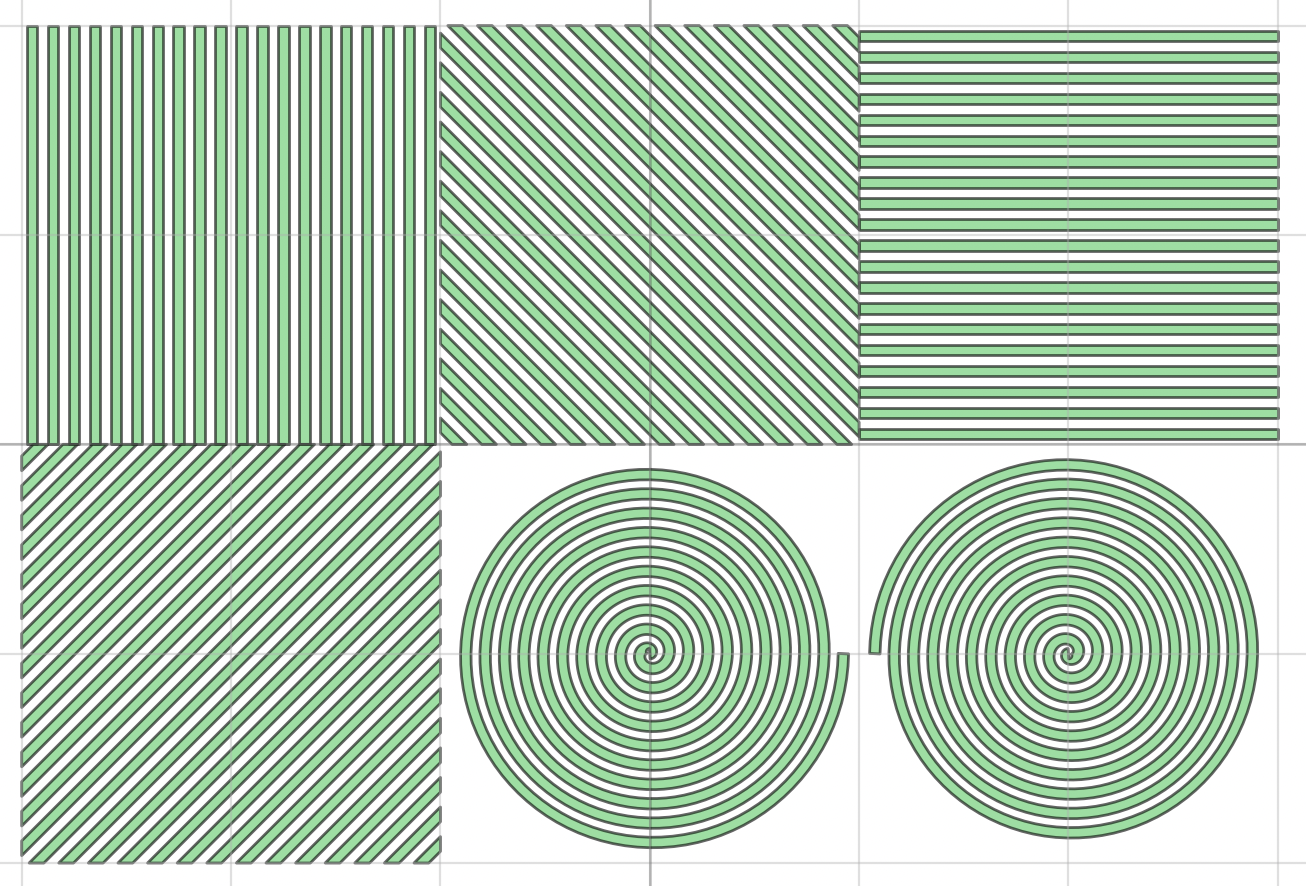

In [668]:
Image(filename="hexArray.png",width=600,height=400)

Modelling the above, six-pixel array. Starting at top left and going clockwise we label pixels $\left(1,2,3,4,5,6\right)$, with $\left(1,2,3,4\right)$ corresponding to linear polarization oriented $\left(0^{\circ}, 45^{\circ}, 90^{\circ}, 135^{\circ}\right)$, $5$ corresponding to Left Hand Circular Polarization, and $6$ corresponding to Right Hand Circular Polarization. Visualizations of 5 and 6 are simplifications - see report for a reference to the actual design.

We can define Mueller matrices and algebraically calculate each pixel's response to the incident light's Stokes vector just as we did for the 4 pixel array:

In [669]:
linRe = 100 #Extinction ratio of linear polarizers is constant
circRe = 5 #Extinction ratio of circular polarizers is much lower than linear polarizers.

m1 = linPolarizer(linRe,0)
m2 = linPolarizer(linRe,45)
m3 = linPolarizer(linRe,90)
m4 = linPolarizer(linRe,135)
m5 = lhcPolarizer(circRe)
m6 = rhcPolarizer(circRe)

incomingLight = np.array(symbols('a b c d'))

#Stokes vector of light at each pixel
p1 = np.matmul(m1,incomingLight)
p2 = np.matmul(m2,incomingLight)
p3 = np.matmul(m3,incomingLight)
p4 = np.matmul(m4,incomingLight)
p5 = np.matmul(m5,incomingLight)
p6 = np.matmul(m6,incomingLight)

#Pixels are only sensitive to intensity
i1 = p1[0]
i2 = p2[0]
i3 = p3[0]
i4 = p4[0]
i5 = p5[0]
i6 = p6[0]

pixelActivation = np.array((i1,i2,i3,i4,i5,i6))
print(pixelActivation)




[0.505*a + 0.495*b 0.505*a + 3.0310008278897e-17*b + 0.495*c
 0.505*a - 0.495*b + 6.0620016557794e-17*c
 0.505*a - 9.0930024836691e-17*b - 0.495*c 0.6*a - 0.4*d 0.6*a + 0.4*d]


In [670]:
M = np.zeros((6,4))

for row, x in enumerate(M):
    for column, y in enumerate(x):
        M[row,column] = pixelActivation[row].coeff(incomingLight[column])

print(M)

[[ 5.05e-01  4.95e-01  0.00e+00  0.00e+00]
 [ 5.05e-01  3.03e-17  4.95e-01  0.00e+00]
 [ 5.05e-01 -4.95e-01  6.06e-17  0.00e+00]
 [ 5.05e-01 -9.09e-17 -4.95e-01  0.00e+00]
 [ 6.00e-01  0.00e+00  0.00e+00 -4.00e-01]
 [ 6.00e-01  0.00e+00  0.00e+00  4.00e-01]]


Once again we've constructed $\mathbf{M}$ such that:

$\vec{P} = \mathbf{M} \cdot \vec{I}$

Where $\vec{P}$ = `pixelActivation`, $\vec{I}$ = `incomingLight`

Again we wish to find left inverse $\mathbf{M}^{-1}$ satisfying $\mathbf{M}^{-1} \cdot \vec{P} = \vec{I}$. Again, Numpy's `linalg.pinv()` function comes to the rescue:

In [671]:
Minverse = np.linalg.pinv(M)
print(Minverse)

[[ 2.90e-01  2.90e-01  2.90e-01  2.90e-01  3.45e-01  3.45e-01]
 [ 1.01e+00  4.56e-16 -1.01e+00 -5.17e-16 -4.08e-17  1.15e-16]
 [ 2.20e-16  1.01e+00  1.39e-16 -1.01e+00  6.07e-17 -5.13e-17]
 [ 5.08e-16 -1.20e-15 -6.91e-16  1.15e-15 -1.25e+00  1.25e+00]]


Let's see how this works! Like the quad array, let's consider the following incoming states of polarization:

$$
\begin{align}
    \vec{i1} &= \begin{bmatrix}1\\1\\0\\0\end{bmatrix}, \vec{i2} &= \begin{bmatrix}1\\-1\\0\\0\end{bmatrix},
    \vec{i3} &= \begin{bmatrix}1\\0\\1\\0\end{bmatrix}, \vec{i4} &= \begin{bmatrix}1\\0\\-1\\0\end{bmatrix},
    \vec{i5} &= \begin{bmatrix}1\\0\\0\\1\end{bmatrix}, \vec{i6} &= \begin{bmatrix}1\\0\\0\\-1\end{bmatrix}
\end{align}
$$

$\vec{i1}$ corresponds to Horizontal polarization ($0^{\circ}$), $\vec{i2}$ = vertical ($90^{\circ}$), $\vec{i3} = +45^{\circ}$, $\vec{i4} = -45^{\circ}$, $\vec{i5}$ = RHCP, $\vec{i6}$ = LHCP. We can calculate and visualize the pixel activations that this would yield on our array:

[0.51 0.51 0.51 0.51 1.   0.2 ]


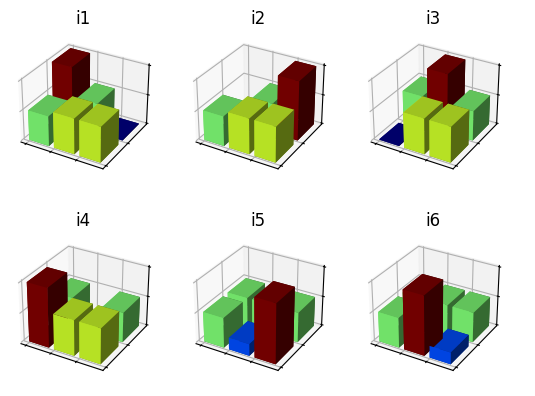

In [672]:
i1 = np.array((1,1,0,0))
i2 = np.array((1,-1,0,0))
i3 = np.array((1,0,1,0))
i4 = np.array((1,0,-1,0))
i5 = np.array((1,0,0,1))
i6 = np.array((1,0,0,-1))

p1 = np.matmul(M,i1)
p2 = np.matmul(M,i2)
p3 = np.matmul(M,i3)
p4 = np.matmul(M,i4)
p5 = np.matmul(M,i5)
p6 = np.matmul(M,i6)

ps = (p1,p2,p3,p4,p5,p6)

fig = plt.figure()

xCoords = (-1,0,1,-1,0,1)
yCoords = (1,1,1,0,0,0)
zCoords = (0,0,0,0,0,0)
width = 0.8
depth = 0.8
norm = plt.Normalize(0,1)
for i, x in enumerate(ps):
    pltnum = 230 + i + 1
    colors = plt.cm.jet(norm(x))
    ax = fig.add_subplot(pltnum,projection='3d')
    ax.set_title("i%i"%(i+1))
    ax.bar3d(xCoords,yCoords,zCoords,width,depth,x,colors)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_zlim(0,1)
    #ax.view_init(75, -90)
    
print(p6)
plt.show()

And here we have a visualization of how each state of polarization activates each pixel! You will notice that for linear states of polarization the linearly filtered pixels activate the same way as the do in the quad array. Howver, critically, we see pixels 5 and 6, while insensitive to linear states of polarization, respond strongly to circularly polarized states!

Using $\mathbf{M}^{-1}$ we can use these pixel activation values to reconstruct the original vectors...

In [673]:
r1 = np.matmul(Minverse,p1)
r2 = np.matmul(Minverse,p2)
r3 = np.matmul(Minverse,p3)
r4 = np.matmul(Minverse,p4)
r5 = np.matmul(Minverse,p5)
r6 = np.matmul(Minverse,p6)

print("Reconstructed i1: " + str(r1))
print("Reconstructed i2: " + str(r2))
print("Reconstructed i3: " + str(r3))
print("Reconstructed i4: " + str(r4))
print("Reconstructed i5: " + str(r5))
print("Reconstructed i6: " + str(r6))

Reconstructed i1: [1.00e+00 1.00e+00 2.59e-16 5.77e-16]
Reconstructed i2: [ 1.00e+00 -1.00e+00 -4.55e-17 -5.33e-16]
Reconstructed i3: [ 1.00e+00  5.23e-16  1.00e+00 -1.20e-15]
Reconstructed i4: [ 1.00e+00 -2.15e-16 -1.00e+00  1.13e-15]
Reconstructed i5: [1.00e+00 2.16e-16 6.21e-17 1.00e+00]
Reconstructed i6: [ 1.00e+00  9.13e-17  1.52e-16 -1.00e+00]


Like the quad array, this array succesfully reconstructs linear states of polarization $\vec{i1},\vec{i2},\vec{i3},\vec{i4}$. However, owing to the additional circular polarization filters, we can succesfully reconstruct circular polarization states $\vec{i5}, \vec{i6}$ as well!

Let's see some Poincare sphere visualizations:

i1:


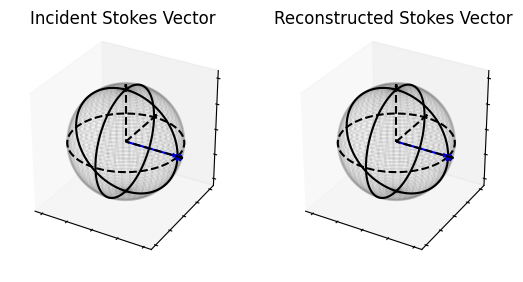

i2:


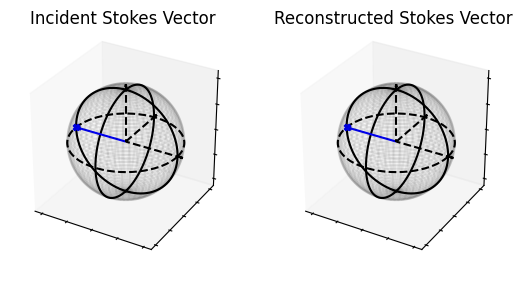

i3:


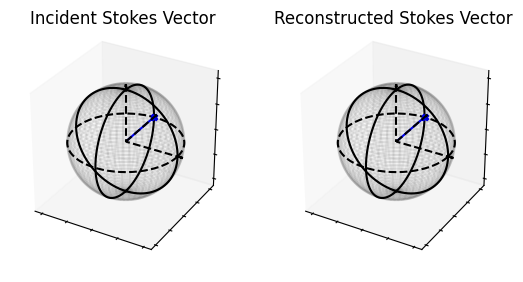

i4:


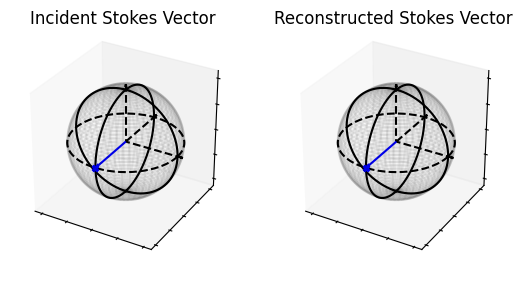

i5:


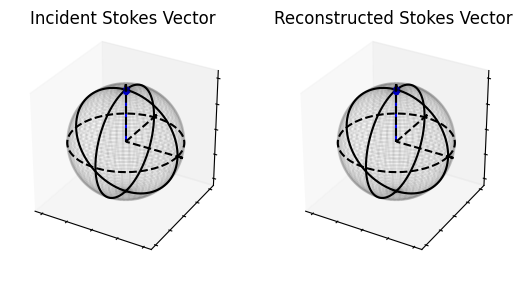

i6:


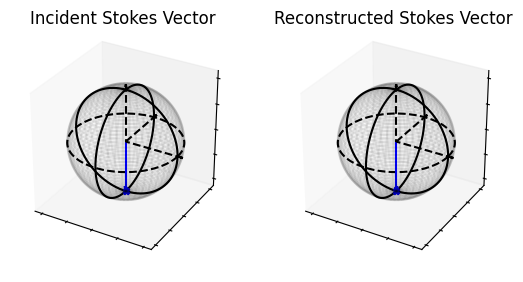

In [674]:
def showReconstruction(s1,s2):
    fig = plt.figure()
    ax1 = fig.add_subplot(121,projection = '3d')
    ax2 = fig.add_subplot(122,projection = '3d')

    #Using function I wrote to visualize poincare sphere, in matrices.py
    ax1 = plotPoincare(s1,ax1)
    ax2 = plotPoincare(s2,ax2)

    ax1.set_title("Incident Stokes Vector")
    ax2.set_title("Reconstructed Stokes Vector")
    plt.show()

print("i1:")
showReconstruction(i1,r1)
print("i2:")
showReconstruction(i2,r2)
print("i3:")
showReconstruction(i3,r3)
print("i4:")
showReconstruction(i4,r4)
print("i5:")
showReconstruction(i5,r5)
print("i6:")
showReconstruction(i6,r6)

And here we see that our additional sensors have removed the blind spot that the 4-Pixel array had! Let's look at the same $\vec{i'}$ that we demonstrated in the other notebook:

$$
\vec{i'} = \begin{bmatrix}
2\\-1\\0\\1
\end{bmatrix}
$$

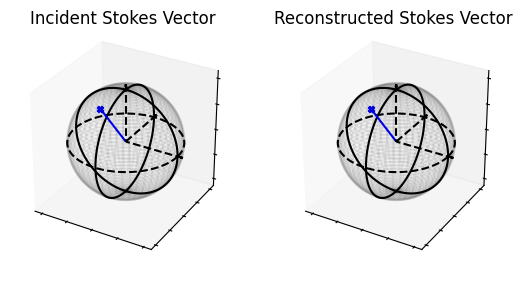

In [675]:
iprime = [2,-1,0,1]
pprime = np.matmul(M,iprime)
rprime = np.matmul(Minverse,pprime)
showReconstruction(iprime,rprime)

Great!

## Pixels with independantly uncertain extinction ratios

Suppose that pixels ${1,2,3,4,5,6}$ did not have uniform and definite extinction ratios, but each pixel has extinction ratio uncertainty ${d_1,d_2,d_3,d_4,d_5,d_6}$. For a given set of these uncertainties we can calculate $\mathbf{M}$:

In [676]:
def getM(dValues):
    global linRe, circRe
    m1 = linPolarizer(linRe + dValues[0],0)
    m2 = linPolarizer(linRe + dValues[1],45)
    m3 = linPolarizer(linRe + dValues[2],90)
    m4 = linPolarizer(linRe + dValues[3],135)
    m5 = lhcPolarizer(circRe + dValues[4])
    m6 = rhcPolarizer(circRe + dValues[5])

    incomingLight = np.array(symbols('a b c d'))

    #Stokes vector of light at each pixel
    p1 = np.matmul(m1,incomingLight)
    p2 = np.matmul(m2,incomingLight)
    p3 = np.matmul(m3,incomingLight)
    p4 = np.matmul(m4,incomingLight)
    p5 = np.matmul(m5,incomingLight)
    p6 = np.matmul(m6,incomingLight)

    #Pixels are only sensitive to intensity
    i1 = p1[0]
    i2 = p2[0]
    i3 = p3[0]
    i4 = p4[0]
    i5 = p5[0]
    i6 = p6[0]

    pixelActivation = np.array((i1,i2,i3,i4,i5,i6))

    M = np.zeros((6,4))

    for row, x in enumerate(M):
        for column, y in enumerate(x):
            M[row,column] = pixelActivation[row].coeff(incomingLight[column])
    
    return M

dValues = [1,0,0,0,0,0]

M_true = getM(dValues)
print(M_true)




[[ 5.05e-01  4.95e-01  0.00e+00  0.00e+00]
 [ 5.05e-01  3.03e-17  4.95e-01  0.00e+00]
 [ 5.05e-01 -4.95e-01  6.06e-17  0.00e+00]
 [ 5.05e-01 -9.09e-17 -4.95e-01  0.00e+00]
 [ 6.00e-01  0.00e+00  0.00e+00 -4.00e-01]
 [ 6.00e-01  0.00e+00  0.00e+00  4.00e-01]]


Because these uncertainties are, in principle, unknown, what happens is this new $\mathbf{M}_{True}$ is used to transform the incident stokes vector into pixel activation values, and then the original $\mathbf{M^{-1}}$ calculated for the ideal case is what is used to transform the (flawed) pixel activation levels to a reconstructed stokes vector.

Below I will define a range that these d values might take for each pixel, and using a Monte Carlo simulation use that to visualize the range of reconstructed vectors.

<Axes3D: >

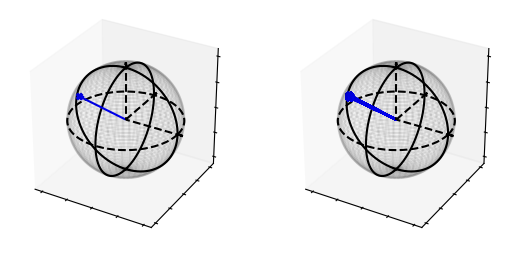

In [677]:
def getDs(dMaxes):
    d0 = random.uniform(-dMaxes[0],dMaxes[0])
    d1 = random.uniform(-dMaxes[1],dMaxes[1])
    d2 = random.uniform(-dMaxes[2],dMaxes[2])
    d3 = random.uniform(-dMaxes[3],dMaxes[3])
    d4 = random.uniform(-dMaxes[4],dMaxes[4])
    d5 = random.uniform(-dMaxes[5],dMaxes[5])
    return (d0,d1,d2,d3,d4,d5)

dMaxes = [10,10,10,10,0.5,0.5]
nTrials = 1000
iVec = [np.sqrt(3),-1,-1,1]

reconstructedVectors = np.zeros((nTrials,4))
for i in range(0, nTrials):
    dValues = getDs(dMaxes)
    MTrue = getM(dValues)
    pixelValues = np.matmul(MTrue,iVec)
    reconstructed = np.matmul(Minverse,pixelValues)
    reconstructedVectors[i] = reconstructed


fig = plt.figure()
ax1 = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection = '3d')

np.savetxt("reconstructedVectors.csv",reconstructedVectors,delimiter=",")
plotPoincare(iVec,ax1)
plotPoincare(reconstructedVectors,ax2,arrow=True)

And we can calculate the average deviation from the original vector...

In [678]:
iMatrix = np.zeros(np.shape(reconstructedVectors))
iMatrix[:] = iVec
diff = reconstructedVectors - iMatrix
diff0 = diff[:,0]
diff1 = diff[:,1]
diff2 = diff[:,2]
diff3 = diff[:,3]

diffMag = np.sqrt(diff0**2 + diff1**2 + diff2**2 + diff3**2)

iMag = np.sqrt(iVec[0]**2 + iVec[1]**2+iVec[2]**2+iVec[3]**2)
percentDiff = 100*diffMag/iMag
meanPercentDiff=np.average(percentDiff)
print(meanPercentDiff)


0.6637053714253749


Let's find a way to write this in a function and make a pretty graph out of it, shall we?

In [695]:
def getPercentDiff(percentError):
    global linRe, circRe, Minverse
    dMaxes = [percentError * linRe, percentError * linRe, percentError * linRe, percentError * linRe, percentError * circRe, percentError * circRe]
    nTrials = 1000
    iVec = [np.sqrt(3),-1,-1,1]

    reconstructedVectors = np.zeros((nTrials,4))
    for i in range(0, nTrials):
        dValues = getDs(dMaxes)
        MTrue = getM(dValues)
        pixelValues = np.matmul(MTrue,iVec)
        reconstructed = np.matmul(Minverse,pixelValues)
        reconstructedVectors[i] = reconstructed
    iMatrix = np.zeros(np.shape(reconstructedVectors))
    iMatrix[:] = iVec
    diff = reconstructedVectors - iMatrix
    diff0 = diff[:,0]
    diff1 = diff[:,1]
    diff2 = diff[:,2]
    diff3 = diff[:,3]

    diffMag = np.sqrt(diff0**2 + diff1**2 + diff2**2 + diff3**2)

    iMag = np.sqrt(iVec[0]**2 + iVec[1]**2+iVec[2]**2+iVec[3]**2)
    percentDiff = 100*diffMag/iMag
    meanPercentDiff=np.average(percentDiff)
    return meanPercentDiff
    

In [698]:
extinctionErrors = np.linspace(0,0.2,20)
outputErrors = np.zeros(np.shape(extinctionErrors))
for i, x in enumerate(extinctionErrors):
    outputErrors[i] = getPercentDiff(x)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


AttributeError: 'Axes' object has no attribute 'xlabel'

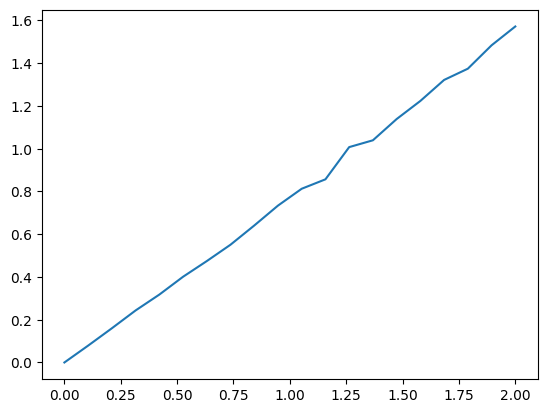

In [699]:
fig, ax = plt.subplots()
ax.plot(extinctionErrors * 100, outputErrors)
ax.set_xlabel("Percent Error in Extinction Ratio")
ax.set_ylabel("Mean Percent Error in Stokes Vector Reconstruction")
ax.set_title("Polarimetry Error vs. Extinction Ratio Error")
ax.grid()